In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


R provides numerous datasets that are accessible through Python

In [2]:
from statsmodels.datasets import get_rdataset

# Access R datasets
ausbeer = get_rdataset('ausbeer', 'fpp2').data


In [4]:
df = pd.read_csv("AUS monthly beer production.csv")
df

,time,value
0,1956.00,284
1,1956.25,213
2,1956.50,227
3,1956.75,308
4,1957.00,262
...,...,...
213,2009.25,398
214,2009.50,419
215,2009.75,488
216,2010.00,414


# Seasonal decomposition

<Figure size 2600x1400 with 0 Axes>

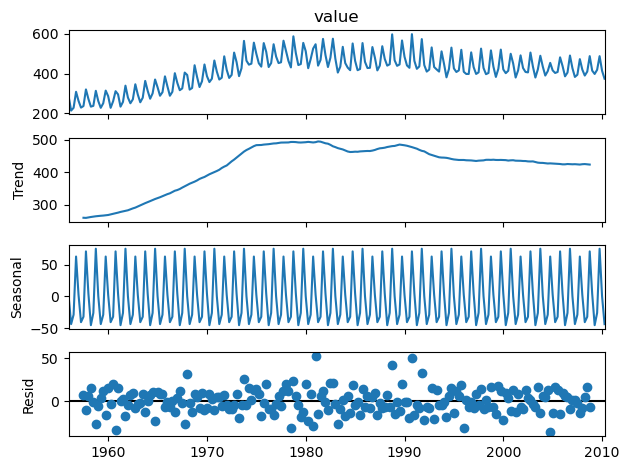

In [ ]:
plt.figure(figsize=(26,14))
# set index to "time"
df_indexed = df.set_index('time')

# call decomposition model (seasonal_decompose)
decomposition = seasonal_decompose(df_indexed['value'], 
                                   model='additive', 
                                   period=12)

decomposition.plot()
plt.show()

# autocorrelation raw data

The data are quaterly (4 observations per year). So for a good analysis:
16 (4quarters * 4 years) or 20 lags (4quarters * 5 years)  
Important is to not exceed: 218/4

If nlags is not specified in the acf --> the standard n=24

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# calculate autocorrelation
acf_values = acf(df.value)
acf_values

array([1.        , 0.68361007, 0.49986057, 0.66666801, 0.93996999,
       0.64390629, 0.45765188, 0.62143982, 0.88738908, 0.59819753,
       0.40993542, 0.57364076, 0.83491233, 0.54268376, 0.35422632,
       0.51852869, 0.76999037, 0.48058745, 0.3002545 , 0.4542808 ,
       0.70365686, 0.41775518, 0.23554345, 0.39325395])

<Figure size 2000x1600 with 0 Axes>

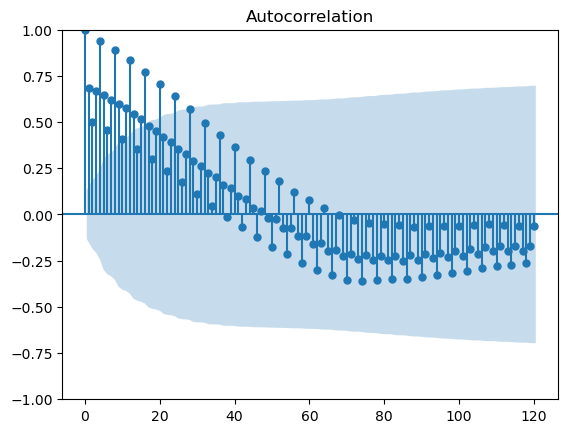

In [ ]:
# plot acf, changing the number of lags
plt.figure(figsize=(20,16))
plot_acf(df.value, lags=4*12)
plt.show()

In [ ]:
# plot pacf
plt.figure(figsize=(20,16))
plot_pacf(df.value)
plt.show()

# correlation stationary data

## check stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller, kpss

# test to check if the data are stationary
def check_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f'{name}:')
    print(f'  ADF Statistic: {result[0]:.4f}')
    print(f'  p-value: {result[1]:.6f}')
    print(f'  Stationary: {result[1] < 0.05}\n')

In [ ]:
# Original series
y_beer = df['value']

# Step 1: Quaterly differencing (lag=4 for quarterly data)
y_seasonal_diff = y_beer.diff(4).dropna()

# Step 2: First differencing (if needed after seasonal diff)
y_stationary_beer = y_seasonal_diff.diff(1).dropna()

# Check stationarity at each step
check_stationarity(y_beer, 'Original')
check_stationarity(y_seasonal_diff, 'After seasonal diff (lag=4)')
check_stationarity(y_stationary_beer, 'After seasonal + first diff')

Original:
  ADF Statistic: -2.6113
  p-value: 0.090677
  Stationary: False

After seasonal diff (lag=4):
  ADF Statistic: -2.0197
  p-value: 0.278018
  Stationary: False

After seasonal + first diff:
  ADF Statistic: -7.3529
  p-value: 0.000000
  Stationary: True



## acf and pacf

In [9]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_values = acf(y_stationary_beer)
acf_values

array([ 1.        , -0.6042335 ,  0.03821059,  0.3240282 , -0.41706747,
        0.17598416,  0.0370265 , -0.0119453 , -0.12420803,  0.1282175 ,
       -0.03660837, -0.07700595,  0.09668543,  0.0408631 , -0.16997874,
        0.18572422, -0.05661095, -0.11917797,  0.22711389, -0.17481435,
        0.04391118,  0.05799566, -0.17255574,  0.17852507])

<Figure size 2400x1600 with 0 Axes>

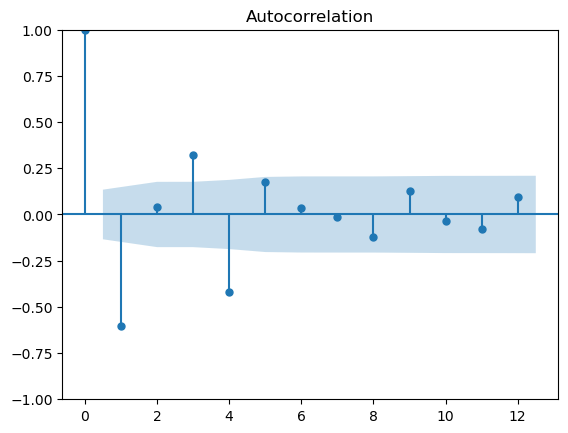

In [10]:
plt.figure(figsize=(24,16))
plot_acf(y_stationary_beer, lags=12)
plt.show()

In [ ]:
# pacf
plt.figure(figsize=(20,16))
plot_acf(y_stationary_beer, lags=12)
plt.show()

# UK electrcity demand

In [ ]:
df=pd.read_csv("UK_electricity_demand_2024_complete.csv")
df

# Seasonal decomposition

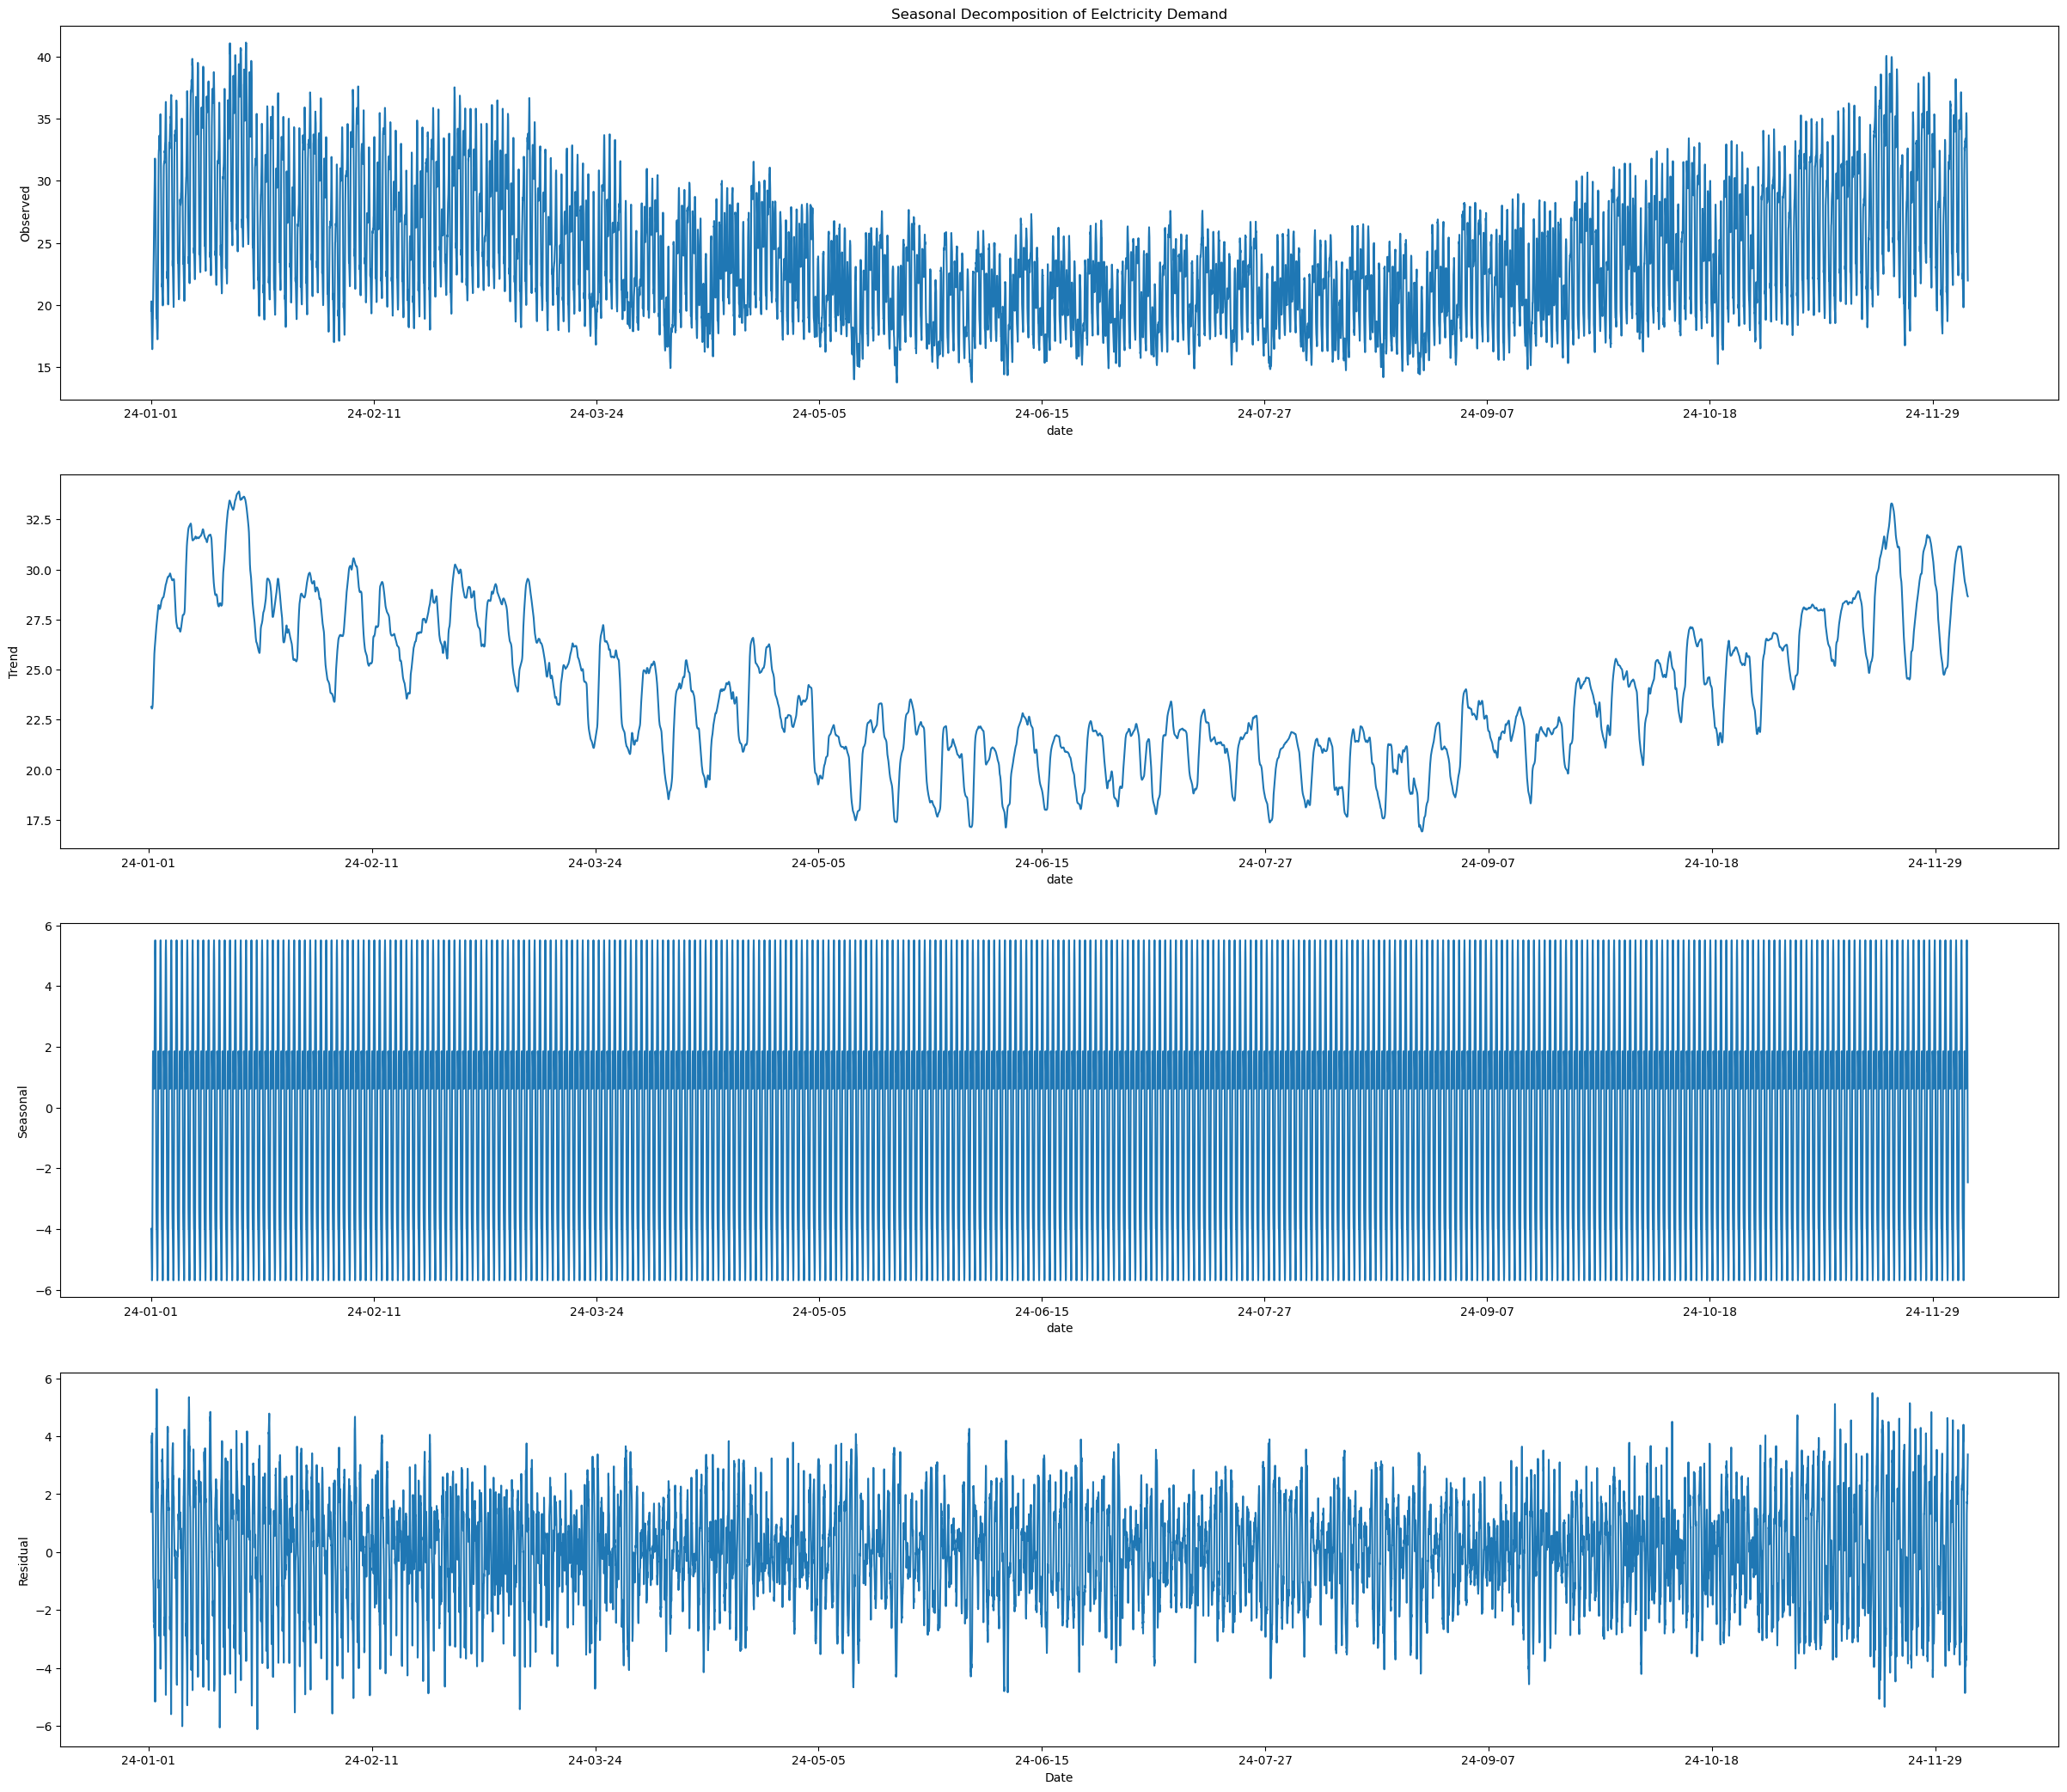

In [19]:
#Set Date as index for seasonal decomposition
df_indexed = df.set_index('date')

decomposition = seasonal_decompose(df_indexed['electricity_demand'], 
                                   model='additive', 
                                   period=48)

fig, axes = plt.subplots(4, 1, figsize=(30, 26))

# Original data
decomposition.observed.plot(ax=axes[0])
axes[0].set_ylabel('Observed')
axes[0].set_title('Seasonal Decomposition of Eelctricity Demand')

# Trend component
decomposition.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')

# Seasonal component
decomposition.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')

# Residual (remainder) component
decomposition.resid.plot(ax=axes[3])
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')

plt.show()

# making it stationary  

Technique	When to Use
Seasonal differencing (lag=48)	Removes daily pattern - usually sufficient
+ First differencing	If trend remains after seasonal diff
Log transform first	If variance changes over time

In [ ]:
df = pd.read_csv('UK_electricity_demand_2024.csv', parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)
y = df['electricity_demand']


timestamp
2024-01-01 00:00:00    19.539
2024-01-01 00:30:00    20.286
2024-01-01 01:00:00    20.070
2024-01-01 01:30:00    19.424
2024-01-01 02:00:00    18.674
                        ...  
2024-12-05 21:30:00    27.212
2024-12-05 22:00:00    25.477
2024-12-05 22:30:00    24.428
2024-12-05 23:00:00    22.590
2024-12-05 23:30:00    21.958
Name: electricity_demand, Length: 16318, dtype: float64

In [37]:
from statsmodels.tsa.stattools import adfuller, kpss

# test to check if the data are stationary
def check_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f'{name}:')
    print(f'  ADF Statistic: {result[0]:.4f}')
    print(f'  p-value: {result[1]:.6f}')
    print(f'  Stationary: {result[1] < 0.05}\n')

In [46]:
# Remove daily seasonality - lag=48
y_seasonal_diff = y.diff(48).dropna()
y_stationary = y_seasonal_diff.diff(1).dropna()



In [47]:
check_stationarity(y, 'Original')
check_stationarity(y_seasonal_diff, 'After seasonal diff (lag=48)')
check_stationarity(y_stationary, 'After seasonal + first diff')

Original:
  ADF Statistic: -2.2453
  p-value: 0.190216
  Stationary: False

After seasonal diff (lag=48):
  ADF Statistic: -17.5720
  p-value: 0.000000
  Stationary: True

After seasonal + first diff:
  ADF Statistic: -22.0331
  p-value: 0.000000
  Stationary: True



# AutoCorrelation

In [51]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_values = acf(y_stationary)
acf_values

array([ 1.00000000e+00,  4.96533890e-01,  3.76566690e-01,  2.54163086e-01,
        1.31003304e-01,  3.59621973e-02, -2.85414938e-02, -6.48749916e-02,
       -9.49678760e-02, -1.03096776e-01, -1.13144502e-01, -1.13705560e-01,
       -1.22740470e-01, -1.13342263e-01, -1.31129905e-01, -1.09832067e-01,
       -1.10488012e-01, -1.03798387e-01, -1.04749479e-01, -8.75956929e-02,
       -7.75745052e-02, -5.25900399e-02, -2.96210607e-02, -1.09102135e-02,
        9.89753982e-03,  1.29281014e-02,  1.71501376e-03, -1.74866540e-03,
        6.99980025e-04,  2.19243988e-03,  1.35758227e-02,  2.17730156e-02,
        3.31017639e-02,  4.94692823e-02,  7.65598276e-02,  7.13197338e-02,
        8.49883176e-02,  8.15807935e-02,  6.89990926e-02,  5.63518204e-02,
        4.05658555e-02,  2.23589746e-02,  1.52869556e-03])

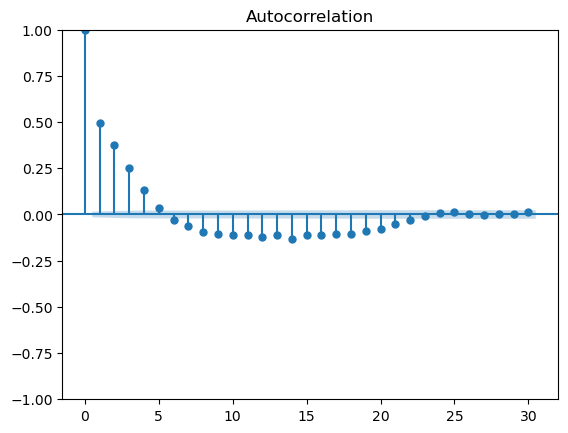

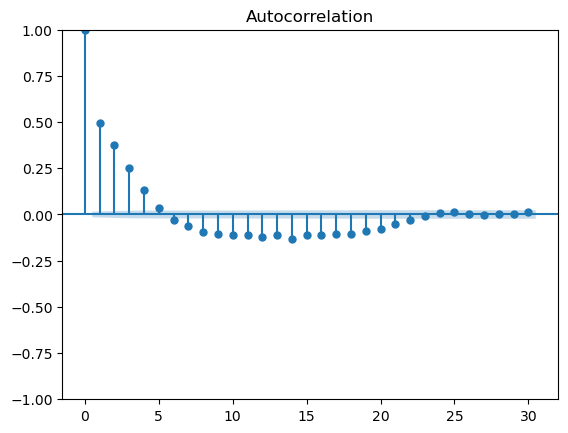

In [54]:
plot_acf(y_stationary, lags=30)

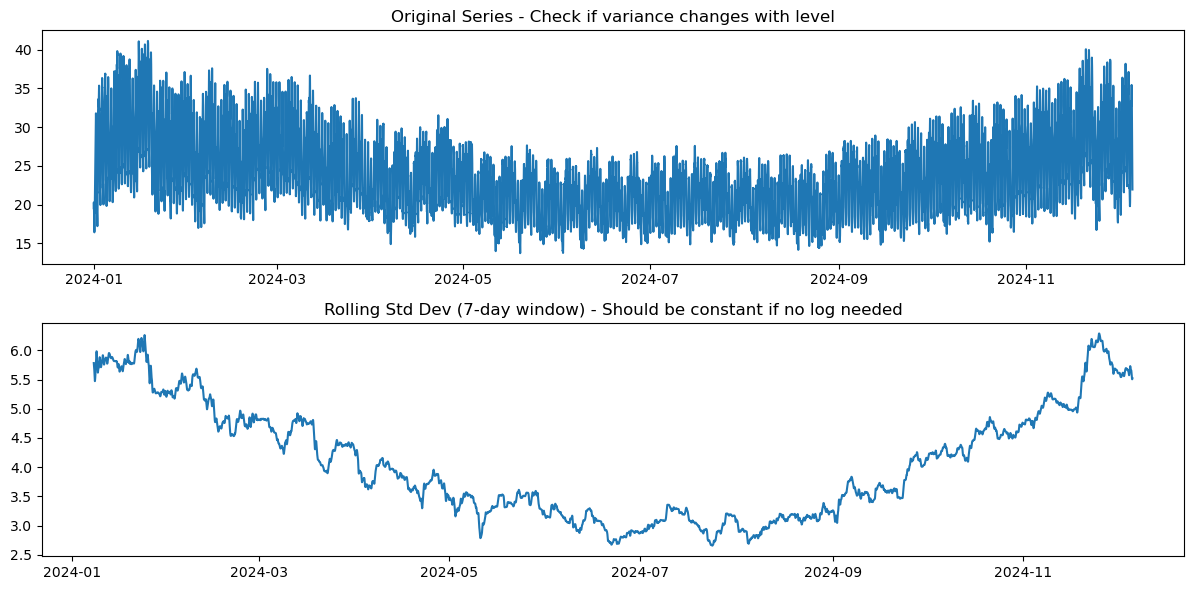

In [55]:
# Plot to check if variance changes over time
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Original series
axes[0].plot(y)
axes[0].set_title('Original Series - Check if variance changes with level')

# Rolling standard deviation
rolling_std = y.rolling(window=336).std()
axes[1].plot(rolling_std)
axes[1].set_title('Rolling Std Dev (7-day window) - Should be constant if no log needed')

plt.tight_layout()
plt.show()